In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import liana as li
import scanpy as sc
from liana.method import singlecellsignalr, connectome, cellphonedb, natmi, logfc, cellchat, geometric_mean
matplotlib.rcParams['pdf.fonttype'] = 42

In [2]:
# prepare the scanpy object corresponding to the seurat object
counts = pd.read_csv("seurat_counts_H.csv", index_col=0)
counts = counts.transpose()
adata = sc.AnnData(counts)
metadata = pd.read_csv("seurat_metadata_H.csv", index_col=0)
adata.obs = metadata.loc[adata.obs_names]
adata.raw = adata.copy()

In [3]:
adata

AnnData object with n_obs × n_vars = 12749 × 59480
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'RNA_snn_res.4', 'seurat_clusters', 'celltype', 'age', 'celltype_deep'

In [4]:
colors = pd.read_csv("humouse.csv") # colors from my cellchat analysis
ourDB = pd.read_csv("CellChatDB_HUMAN.csv", index_col=0) # our curated database with cellphone, celltalk, cellchat

## Run the LIANA consensus method with their database or our database

In [5]:
# run the multimethod consensus LIANA method with the LIANA DB
li.mt.rank_aggregate(adata,
                     groupby='celltype',
                     resource_name='consensus',
                     expr_prop=0.05,
                     verbose=True)

lrresults = adata.uns['liana_res']
lrresults = lrresults.loc[(lrresults['source'].isin(colors['human'])) & (lrresults['target'].isin(colors['human'])),:]
THR = 0.2 #################
lrresults = lrresults.loc[lrresults['specificity_rank'] < THR,:]
lrresults = lrresults.loc[lrresults['magnitude_rank'] < 1,:] # remove those ranked by all methods as negligible magnitude
liana_results_lianaDB = lrresults.copy()
cols = liana_results_lianaDB.columns.values
cols[cols == "ligand_complex"] = "ligand"
cols[cols == "receptor_complex"] = "receptor"
liana_results_lianaDB.columns = cols

# run the multimethod consensus LIANA method with our DB
li.mt.rank_aggregate(adata,
                     groupby='celltype',
                     resource=ourDB[["ligand","receptor"]],
                     expr_prop=0.05, ##### we have few cells
                     verbose=True)

lrresults = adata.uns['liana_res']
lrresults = lrresults.loc[(lrresults['source'].isin(colors['human'])) & (lrresults['target'].isin(colors['human'])),:]
THR = 0.2 #################
lrresults = lrresults.loc[lrresults['specificity_rank'] < THR,:]
lrresults = lrresults.loc[lrresults['magnitude_rank'] < 1,:] 
liana_results_ourDB = lrresults.copy()
cols = liana_results_ourDB.columns.values
cols[cols == "ligand_complex"] = "ligand"
cols[cols == "receptor_complex"] = "receptor"
liana_results_ourDB.columns = cols

Using resource `consensus`.
Using `.raw`!
Converting to sparse csr matrix!
/data/luca/software/anaconda3/envs/liana_py/lib/python3.12/site-packages/anndata/_core/anndata.py:401: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
23745 features of mat are empty, they will be removed.
Make sure that normalized counts are passed!
Converting `celltype` to categorical!
/data/luca/emiliapaper2/liana-py/liana/method/_pipe_utils/_pre.py:271: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
/data/luca/emiliapaper2/liana-py/liana/method/_pipe_utils/_pre.py:153: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
The following cell identities were excluded: OPC
0.09 of entities in the resource are missing from the data.


Generating ligand-receptor stats for 12748 samples and 1667 features


/data/luca/emiliapaper2/liana-py/liana/method/sc/_liana_pipe.py:262: ImplicitModificationWarning: Setting element `.layers['scaled']` of view, initializing view as actual.


Assuming that counts were `natural` log-normalized!
Running CellPhoneDB


100%|██████████| 1000/1000 [00:16<00:00, 60.78it/s]


Running Connectome
Running log2FC
Running NATMI
Running SingleCellSignalR


Using `.raw`!
Converting to sparse csr matrix!


Using provided `resource`.


/data/luca/software/anaconda3/envs/liana_py/lib/python3.12/site-packages/anndata/_core/anndata.py:401: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
23745 features of mat are empty, they will be removed.
Make sure that normalized counts are passed!
Converting `celltype` to categorical!
/data/luca/emiliapaper2/liana-py/liana/method/_pipe_utils/_pre.py:271: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
/data/luca/emiliapaper2/liana-py/liana/method/_pipe_utils/_pre.py:153: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
The following cell identities were excluded: OPC
0.11 of entities in the resource are missing from the data.


Generating ligand-receptor stats for 12748 samples and 1597 features


/data/luca/emiliapaper2/liana-py/liana/method/sc/_liana_pipe.py:262: ImplicitModificationWarning: Setting element `.layers['scaled']` of view, initializing view as actual.


Assuming that counts were `natural` log-normalized!
Running CellPhoneDB


100%|██████████| 1000/1000 [00:16<00:00, 59.46it/s]


Running Connectome
Running log2FC
Running NATMI
Running SingleCellSignalR


## Run CellChat-py through LIANA, with their database or our database

In [6]:
cellchat(adata,
            groupby='celltype',
            resource_name='consensus', ##############################
            expr_prop=0.1,
            verbose=True, key_added='cellchat_res')
lrresults = adata.uns['cellchat_res']
lrresults = lrresults.loc[(lrresults['source'].isin(colors['human'])) & (lrresults['target'].isin(colors['human'])),:]
THR = 0.05 ################# P-VALUE THRESHOLD
lrresults = lrresults.loc[lrresults['cellchat_pvals'] < THR,:]
cellchat_results_lianaDB = lrresults.copy()

cellchat(adata,
            groupby='celltype',
            resource=ourDB[["ligand","receptor"]], 
            expr_prop=0.1,
            verbose=True, key_added='cellchat_res_ourDB')
lrresults = adata.uns['cellchat_res_ourDB']
lrresults = lrresults.loc[(lrresults['source'].isin(colors['human'])) & (lrresults['target'].isin(colors['human'])),:]
THR = 0.05 ################# P-VALUE THRESHOLD
lrresults = lrresults.loc[lrresults['cellchat_pvals'] < THR,:]
cellchat_results_ourDB = lrresults.copy()

Using resource `consensus`.
Using `.raw`!
Converting to sparse csr matrix!
/data/luca/software/anaconda3/envs/liana_py/lib/python3.12/site-packages/anndata/_core/anndata.py:401: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
23745 features of mat are empty, they will be removed.
Make sure that normalized counts are passed!
Converting `celltype` to categorical!
/data/luca/emiliapaper2/liana-py/liana/method/_pipe_utils/_pre.py:271: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
/data/luca/emiliapaper2/liana-py/liana/method/_pipe_utils/_pre.py:153: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
The following cell identities were excluded: OPC
0.09 of entities in the resource are missing from the data.


Generating ligand-receptor stats for 12748 samples and 1667 features


100%|██████████| 1000/1000 [08:08<00:00,  2.05it/s]
Using `.raw`!
Converting to sparse csr matrix!


Using provided `resource`.


/data/luca/software/anaconda3/envs/liana_py/lib/python3.12/site-packages/anndata/_core/anndata.py:401: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
23745 features of mat are empty, they will be removed.
Make sure that normalized counts are passed!
Converting `celltype` to categorical!
/data/luca/emiliapaper2/liana-py/liana/method/_pipe_utils/_pre.py:271: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
/data/luca/emiliapaper2/liana-py/liana/method/_pipe_utils/_pre.py:153: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
The following cell identities were excluded: OPC
0.11 of entities in the resource are missing from the data.


Generating ligand-receptor stats for 12748 samples and 1597 features


100%|██████████| 1000/1000 [07:43<00:00,  2.16it/s]


## Run CellPhoneDB through LIANA, with their database or our database

In [7]:
cellphonedb(adata,
            groupby='celltype',
            resource_name='consensus', ##############################
            expr_prop=0.1,
            verbose=True, key_added='cpdb_res')
lrresults = adata.uns['cpdb_res']
lrresults = lrresults.loc[(lrresults['source'].isin(colors['human'])) & (lrresults['target'].isin(colors['human'])),:]
THR = 0.05 ################# P-VALUE THRESHOLD
lrresults = lrresults.loc[lrresults['cellphone_pvals'] < THR,:]
lrresults = lrresults.loc[lrresults['lr_means'] > 0.2,:] # remove those with negligible magnitude (VERY EMPIRICAL)
cellphone_results_lianaDB = lrresults.copy()

cellphonedb(adata,
            groupby='celltype',
            resource=ourDB[["ligand","receptor"]], 
            expr_prop=0.1,
            verbose=True, key_added='cpdb_res')
lrresults = adata.uns['cpdb_res']
lrresults = lrresults.loc[(lrresults['source'].isin(colors['human'])) & (lrresults['target'].isin(colors['human'])),:]
THR = 0.05 ################# P-VALUE THRESHOLD
lrresults = lrresults.loc[lrresults['cellphone_pvals'] < THR,:]
lrresults = lrresults.loc[lrresults['lr_means'] > 0.2,:] # remove those with negligible magnitude (VERY EMPIRICAL)
cellphone_results_ourDB = lrresults.copy()

Using resource `consensus`.
Using `.raw`!
Converting to sparse csr matrix!
/data/luca/software/anaconda3/envs/liana_py/lib/python3.12/site-packages/anndata/_core/anndata.py:401: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
23745 features of mat are empty, they will be removed.
Make sure that normalized counts are passed!
Converting `celltype` to categorical!
/data/luca/emiliapaper2/liana-py/liana/method/_pipe_utils/_pre.py:271: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
/data/luca/emiliapaper2/liana-py/liana/method/_pipe_utils/_pre.py:153: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
The following cell identities were excluded: OPC
0.09 of entities in the resource are missing from the data.


Generating ligand-receptor stats for 12748 samples and 1667 features


100%|██████████| 1000/1000 [00:16<00:00, 60.60it/s]
Using `.raw`!
Converting to sparse csr matrix!


Using provided `resource`.


/data/luca/software/anaconda3/envs/liana_py/lib/python3.12/site-packages/anndata/_core/anndata.py:401: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
23745 features of mat are empty, they will be removed.
Make sure that normalized counts are passed!
Converting `celltype` to categorical!
/data/luca/emiliapaper2/liana-py/liana/method/_pipe_utils/_pre.py:271: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
/data/luca/emiliapaper2/liana-py/liana/method/_pipe_utils/_pre.py:153: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
The following cell identities were excluded: OPC
0.11 of entities in the resource are missing from the data.


Generating ligand-receptor stats for 12748 samples and 1597 features


100%|██████████| 1000/1000 [00:16<00:00, 61.43it/s]


## Read in our CellChat-R results

In [8]:
cellchatcomms = pd.read_csv("communication_filtered_all3databases2_HUMAN.txt", sep="\t")
cellchatcomms

,source,target,ligand,receptor,prob,pval,interaction_name,interaction_name_2,pathway_name,annotation,evidence
22620,FP-Rgl1,Gaba,SLIT2,ROBO1,0.451193,0.0,SLIT2_ROBO1,SLIT2_ROBO1,SLIT2,NaN,"celltalkdb_10102268, cellphonedb_reactome;unip..."
22623,nonFP-Rgl1,Gaba,SLIT2,ROBO1,0.423803,0.0,SLIT2_ROBO1,SLIT2_ROBO1,SLIT2,NaN,"celltalkdb_10102268, cellphonedb_reactome;unip..."
22626,Rgl3,Gaba,SLIT2,ROBO1,0.414546,0.0,SLIT2_ROBO1,SLIT2_ROBO1,SLIT2,NaN,"celltalkdb_10102268, cellphonedb_reactome;unip..."
22625,ProgFP,Gaba,SLIT2,ROBO1,0.407919,0.0,SLIT2_ROBO1,SLIT2_ROBO1,SLIT2,NaN,"celltalkdb_10102268, cellphonedb_reactome;unip..."
22451,FP-Rgl1,DA_ALDH1A1+,SLIT2,DCC,0.386676,0.0,SLIT2_DCC,SLIT2_DCC,SLIT2,NaN,celltalkdb_32196115
...,...,...,...,...,...,...,...,...,...,...,...
18239,FP-DA0,GabaNb,NRXN1,LRRTM4,0.030030,0.0,NRXN1_LRRTM4,NRX1A_LRRT4,NRXN1,NaN,cellphonedb_PMID:29100073
18238,DA_ALDH1A1+,GabaNb,NRXN1,LRRTM4,0.030026,0.0,NRXN1_LRRTM4,NRX1A_LRRT4,NRXN1,NaN,cellphonedb_PMID:29100073
17167,ProgFP,Gaba,CHL1,CHL1,0.030024,0.0,CHL1_CHL1,NCHL1_NCHL1,CHL1,NaN,cellphonedb_Shilts screen - VALIDATED
17215,Gaba,ProgFP,CHL1,CHL1,0.030024,0.0,CHL1_CHL1,NCHL1_NCHL1,CHL1,NaN,cellphonedb_Shilts screen - VALIDATED


In [9]:
result_dfs = [cellchatcomms, liana_results_lianaDB, liana_results_ourDB, cellchat_results_lianaDB, cellchat_results_ourDB, cellphone_results_lianaDB, cellphone_results_ourDB]

In [10]:
remove = ["APP", "HSP90AA1", "CALM1", "RPSA", "NCL", "ADAM17"]

In [11]:
result_dfs = [res.loc[~res['ligand'].isin(remove) & ~res['receptor'].isin(remove), :] for res in result_dfs]
result_dfs

[            source       target ligand receptor      prob  pval  \
 22620      FP-Rgl1         Gaba  SLIT2    ROBO1  0.451193   0.0   
 22623   nonFP-Rgl1         Gaba  SLIT2    ROBO1  0.423803   0.0   
 22626         Rgl3         Gaba  SLIT2    ROBO1  0.414546   0.0   
 22625       ProgFP         Gaba  SLIT2    ROBO1  0.407919   0.0   
 22451      FP-Rgl1  DA_ALDH1A1+  SLIT2      DCC  0.386676   0.0   
 ...            ...          ...    ...      ...       ...   ...   
 18239       FP-DA0       GabaNb  NRXN1   LRRTM4  0.030030   0.0   
 18238  DA_ALDH1A1+       GabaNb  NRXN1   LRRTM4  0.030026   0.0   
 17167       ProgFP         Gaba   CHL1     CHL1  0.030024   0.0   
 17215         Gaba       ProgFP   CHL1     CHL1  0.030024   0.0   
 18884       GabaNb       GabaNb  NRXN3   CLSTN1  0.030008   0.0   
 
       interaction_name interaction_name_2 pathway_name annotation  \
 22620      SLIT2_ROBO1        SLIT2_ROBO1        SLIT2        NaN   
 22623      SLIT2_ROBO1        SLIT2_ROBO1

In [12]:
for res in result_dfs:
    res.index = res.source + "_" + res.target + "_" + res.ligand + "_" + res.receptor

In [13]:
callsets = [res.index.values for res in result_dfs]

/data/luca/software/anaconda3/envs/liana_py/lib/python3.12/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


/data/luca/software/anaconda3/envs/liana_py/lib/python3.12/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

<Figure size 1000x600 with 0 Axes>

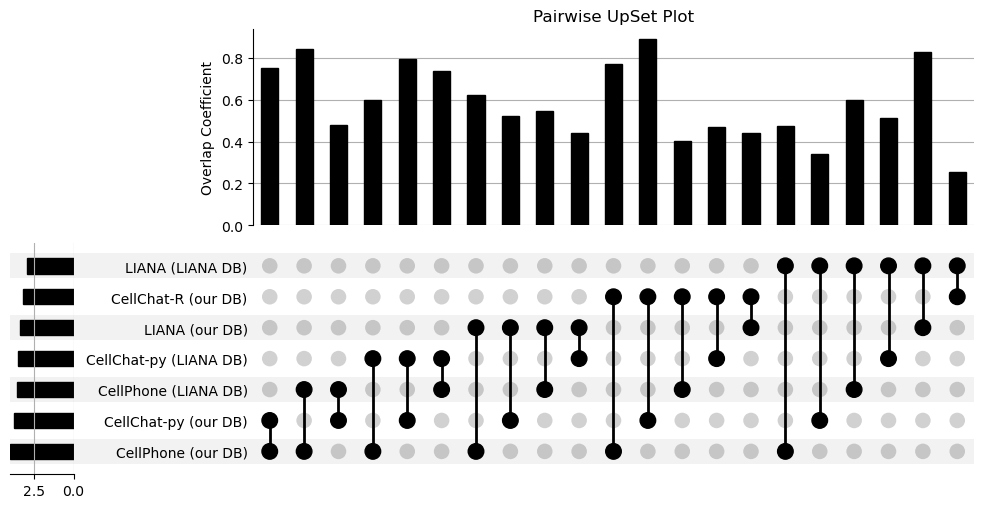

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools
from upsetplot import plot

names = [
    "CellChat-R (our DB)",
    "LIANA (LIANA DB)",
    "LIANA (our DB)",
    "CellChat-py (LIANA DB)",
    "CellChat-py (our DB)",
    "CellPhone (LIANA DB)",
    "CellPhone (our DB)"
]

contents = {name: set(cs) for name, cs in zip(names, callsets)}

n = len(names)
pairwise_values = {}
for comb in itertools.product([False, True], repeat=n):
    if sum(comb) != 2:
        continue
    selected_indices = [i for i, flag in enumerate(comb) if flag]
    selected_names = [names[i] for i in selected_indices]
    inter = set.intersection(*(contents[name] for name in selected_names))
    set_sizes = [len(contents[name]) for name in selected_names]
    denom = min(set_sizes) if set_sizes else 0
    
    norm_val = len(inter) / denom if denom > 0 else 0
    pairwise_values[comb] = norm_val

pairwise_series = pd.Series(pairwise_values)

pairwise_series.index = pairwise_series.index.set_names(names)

plt.figure(figsize=(10, 6))
plot(pairwise_series)
plt.title("Pairwise UpSet Plot")
plt.ylabel("Overlap Coefficient")
plt.savefig("upset_H.pdf")
plt.show()

## Conservation of source and target rankings

maxp pruned
cmap pruned
kern dropped
post pruned
FFTM dropped
GPOS pruned
GSUB pruned
glyf pruned
Added gid0 to subset
Added first four glyphs to subset
Closing glyph list over 'MATH': 51 glyphs before
Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'D', 'I', 'L', 'N', 'P', 'R', 'S', 'T', 'U', 'a', 'bar', 'c', 'comma', 'd', 'e', 'eight', 'five', 'four', 'g', 'h', 'hyphen', 'i', 'l', 'm', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'period', 'r', 's', 'seven', 'six', 'space', 't', 'three', 'two', 'u', 'v', 'w', 'y', 'zero']
Glyph IDs:   [0, 1, 2, 3, 11, 12, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 36, 37, 38, 39, 44, 47, 49, 51, 53, 54, 55, 56, 68, 70, 71, 72, 74, 75, 76, 79, 80, 81, 82, 83, 85, 86, 87, 88, 89, 90, 92, 95]
Closed glyph list over 'MATH': 57 glyphs after
Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'D', 'I', 'L', 'N', 'P', 'R', 'S', 'T', 'U', 'a', 'bar', 'c', 'comma', 'd', 'e', 'eight', 'five', 'four', 'g', 'h', 'hyphen', '

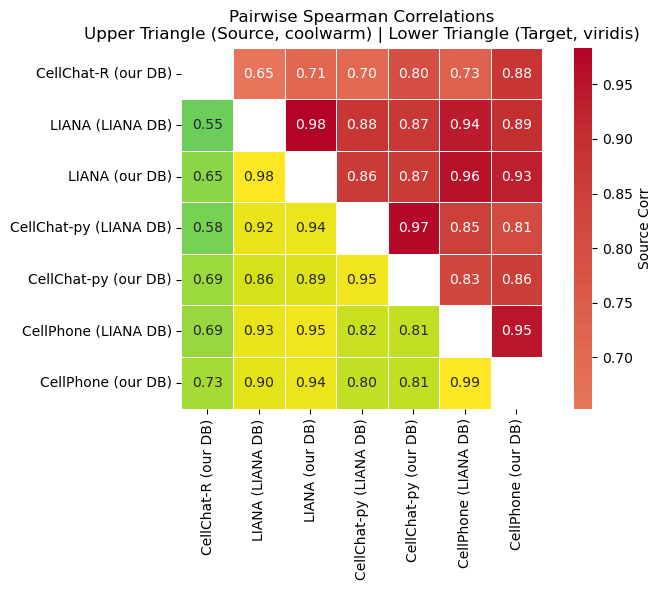

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

n = len(result_dfs)
corr_matrix = np.empty((n, n))
corr_matrix[:] = np.nan  

for i in range(n):
    for j in range(n):
        if i == j:
            corr_matrix[i, j] = np.nan  
        elif i < j:
            vc1 = result_dfs[i]['source'].value_counts()
            vc2 = result_dfs[j]['source'].value_counts().loc[vc1.index]
            rho, _ = spearmanr(vc1, vc2)
            corr_matrix[i, j] = rho
        else:
            vc1 = result_dfs[i]['target'].value_counts()
            vc2 = result_dfs[j]['target'].value_counts().loc[vc1.index]
            rho, _ = spearmanr(vc1, vc2)
            corr_matrix[i, j] = rho


labels = names
corr_df = pd.DataFrame(corr_matrix, index=labels, columns=labels)

mask_upper = np.triu(np.ones_like(corr_df, dtype=bool), k=1)
mask_lower = np.tril(np.ones_like(corr_df, dtype=bool), k=-1)

fig, ax = plt.subplots(figsize=(8, 6))

sns.heatmap(corr_df, mask=mask_lower, annot=True, fmt=".2f", cmap="coolwarm",
            center=0, square=True, linewidths=0.5, cbar=True,
            cbar_kws={"label": "Source Corr"}, ax=ax)

sns.heatmap(corr_df, mask=mask_upper, annot=True, fmt=".2f", cmap="viridis",
            center=0, square=True, linewidths=0.5, cbar=False, ax=ax)

ax.set_title("Pairwise Spearman Correlations\n"
             "Upper Triangle (Source, coolwarm) | Lower Triangle (Target, viridis)")
plt.tight_layout()
plt.savefig("ranks_are_conserved_H.pdf")
plt.show()

## Compare the two databases

In [16]:
lianaDB = li.resource.select_resource("consensus")
s1 = (ourDB['ligand']+"_"+ourDB['receptor']).values
s2 = (lianaDB['ligand']+"_"+lianaDB['receptor']).values
s2

array(['LGALS9_PTPRC', 'LGALS9_MET', 'LGALS9_CD44', ..., 'CSF1_CSF3R',
       'IL36G_IFNAR1', 'IL36G_IFNAR2'], dtype=object)

maxp pruned
cmap pruned
kern dropped
post pruned
FFTM dropped
GPOS pruned
GSUB pruned
glyf pruned
Added gid0 to subset
Added first four glyphs to subset
Closing glyph list over 'MATH': 21 glyphs before
Glyph names: ['.notdef', '.null', 'A', 'B', 'D', 'I', 'L', 'N', 'eight', 'five', 'four', 'nine', 'nonmarkingreturn', 'o', 'one', 'r', 'seven', 'space', 'three', 'two', 'u']
Glyph IDs:   [0, 1, 2, 3, 20, 21, 22, 23, 24, 26, 27, 28, 36, 37, 39, 44, 47, 49, 82, 85, 88]
Closed glyph list over 'MATH': 21 glyphs after
Glyph names: ['.notdef', '.null', 'A', 'B', 'D', 'I', 'L', 'N', 'eight', 'five', 'four', 'nine', 'nonmarkingreturn', 'o', 'one', 'r', 'seven', 'space', 'three', 'two', 'u']
Glyph IDs:   [0, 1, 2, 3, 20, 21, 22, 23, 24, 26, 27, 28, 36, 37, 39, 44, 47, 49, 82, 85, 88]
Closing glyph list over 'GSUB': 21 glyphs before
Glyph names: ['.notdef', '.null', 'A', 'B', 'D', 'I', 'L', 'N', 'eight', 'five', 'four', 'nine', 'nonmarkingreturn', 'o', 'one', 'r', 'seven', 'space', 'three', 'two', 

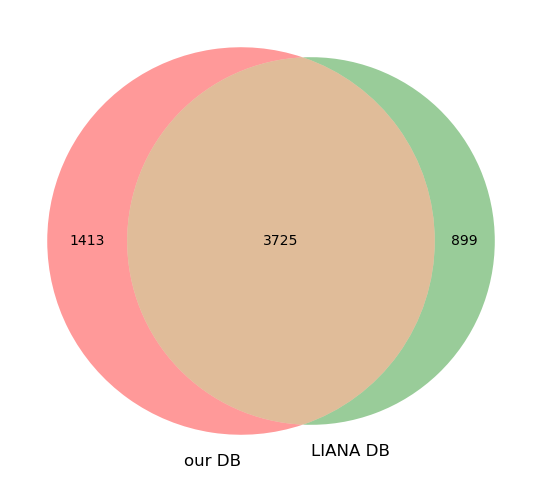

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

set1 = set(s1)
set2 = set(s2)
plt.figure(figsize=(8, 6))
venn_diagram = venn2([set1, set2], set_labels=("our DB", "LIANA DB"))

plt.savefig("venn_H.pdf")
plt.show()

## LIANA engine + our DB does not lose any interaction that we reported

maxp pruned
cmap pruned
kern dropped
post pruned
FFTM dropped
GPOS pruned
GSUB pruned
glyf pruned
Added gid0 to subset
Added first four glyphs to subset
Closing glyph list over 'MATH': 54 glyphs before
Glyph names: ['.notdef', '.null', 'A', 'C', 'D', 'F', 'H', 'I', 'L', 'M', 'N', 'P', 'R', 'S', 'a', 'b', 'c', 'comma', 'd', 'e', 'eight', 'equal', 'f', 'five', 'four', 'g', 'h', 'hyphen', 'i', 'k', 'l', 'm', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'period', 'plus', 'quotesingle', 'r', 's', 'six', 'space', 't', 'three', 'two', 'u', 'underscore', 'y', 'zero']
Glyph IDs:   [0, 1, 2, 3, 10, 11, 12, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 27, 28, 32, 36, 38, 39, 41, 43, 44, 47, 48, 49, 51, 53, 54, 66, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 85, 86, 87, 88, 92]
Closed glyph list over 'MATH': 60 glyphs after
Glyph names: ['.notdef', '.null', 'A', 'C', 'D', 'F', 'H', 'I', 'L', 'M', 'N', 'P', 'R', 'S', 'a', 'b', 'c', 'comma', 'd', 'e', '

Spearman correlation: 0.303, p-value: 0.001


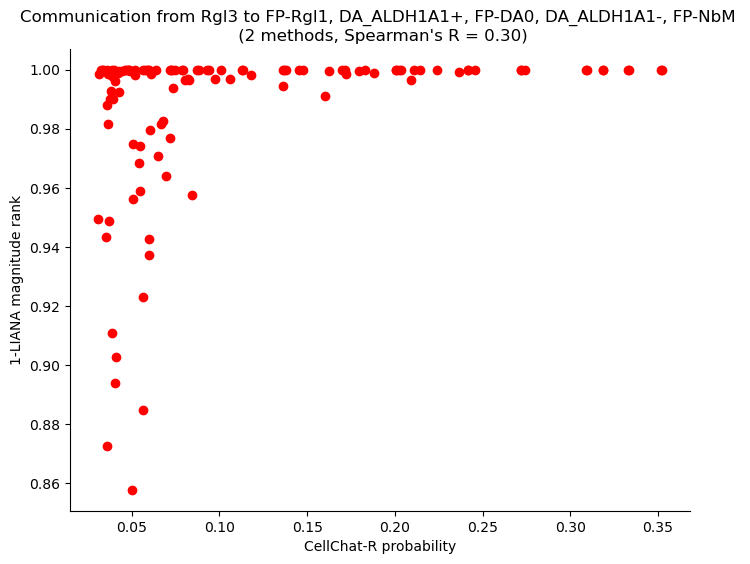

In [18]:
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

cellchatcomms = result_dfs[0]
ccrgl3 = cellchatcomms.loc[
    (cellchatcomms['source'] == "Rgl3") & (cellchatcomms['target'].isin(['FP-Rgl1', 'DA_ALDH1A1+', 'FP-DA0', 'DA_ALDH1A1-', 'FP-NbM'])),
    :
]
lianargl3 = result_dfs[2].loc[result_dfs[2].index.isin(ccrgl3.index), :]
lianargl3_extended = lianargl3.reindex(ccrgl3.index, fill_value=0)
lianargl3_extended = lianargl3_extended.loc[ccrgl3.index, :]

x = ccrgl3["prob"]
x = x.groupby(x.index).mean()  # average per index
y = 1 - lianargl3_extended['magnitude_rank']
y = y.groupby(y.index).mean()

rho, p_value = spearmanr(x, y)
print(f"Spearman correlation: {rho:.3f}, p-value: {p_value:.3f}")

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x, y, c="red")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel("CellChat-R probability")
ax.set_ylabel("1-LIANA magnitude rank")
plt.title(f"Communication from Rgl3 to FP-Rgl1, DA_ALDH1A1+, FP-DA0, DA_ALDH1A1-, FP-NbM \n (2 methods, Spearman's R = {rho:.2f})")
plt.savefig("liana_onourDB_rediscoversall_H.pdf")
plt.show()

In [19]:
sum(y == 1) / len(y)

0.31896551724137934

In [20]:
# 32% that we have for these cell types of interest in human is NOT there in LIANA... while in mouse it was only 7%..
y[y==1].index # report them... there are some slit unfortunately

Index(['Rgl3_DA_ALDH1A1+_MDK_GPC2', 'Rgl3_DA_ALDH1A1+_NCAM1_NCAM1',
       'Rgl3_DA_ALDH1A1+_NCAM1_ROBO1', 'Rgl3_DA_ALDH1A1+_NLGN1_NRXN1',
       'Rgl3_DA_ALDH1A1+_NRXN1_LRRTM4', 'Rgl3_DA_ALDH1A1+_NXPH1_NRXN1',
       'Rgl3_DA_ALDH1A1+_SLIT1_ROBO1', 'Rgl3_DA_ALDH1A1+_SLIT2_ROBO1',
       'Rgl3_DA_ALDH1A1-_NCAM1_NCAM1', 'Rgl3_DA_ALDH1A1-_NCAM1_ROBO1',
       'Rgl3_DA_ALDH1A1-_NLGN1_NRXN1', 'Rgl3_DA_ALDH1A1-_SLIT1_ROBO1',
       'Rgl3_DA_ALDH1A1-_SLIT2_ROBO1', 'Rgl3_DA_ALDH1A1-_TENM3_ADGRL3',
       'Rgl3_DA_ALDH1A1-_TENM4_ADGRL3', 'Rgl3_FP-DA0_CDH2_CDH2',
       'Rgl3_FP-DA0_CHL1_CHL1', 'Rgl3_FP-DA0_HMGB1_CXCR4',
       'Rgl3_FP-DA0_NCAM1_NCAM1', 'Rgl3_FP-DA0_NCAM1_ROBO1',
       'Rgl3_FP-DA0_SLIT1_ROBO1', 'Rgl3_FP-DA0_SLIT2_ROBO1',
       'Rgl3_FP-DA0_SLIT2_ROBO2', 'Rgl3_FP-DA0_TENM3_ADGRL3',
       'Rgl3_FP-DA0_TENM4_ADGRL3', 'Rgl3_FP-NbM_CDH2_CDH2',
       'Rgl3_FP-NbM_MDK_GPC2', 'Rgl3_FP-NbM_NCAM1_ROBO1',
       'Rgl3_FP-NbM_NLGN1_NRXN1', 'Rgl3_FP-NbM_SLIT1_ROBO1',
       'Rgl3_FP-N

maxp pruned
cmap pruned
kern dropped
post pruned
FFTM dropped
GPOS pruned
GSUB pruned


Spearman correlation: 0.598, p-value: 0.000


glyf pruned
Added gid0 to subset
Added first four glyphs to subset
Closing glyph list over 'MATH': 47 glyphs before
Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'D', 'L', 'M', 'N', 'P', 'R', 'S', 'a', 'b', 'c', 'comma', 'd', 'e', 'equal', 'f', 'five', 'g', 'h', 'hyphen', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'period', 'quotesingle', 'r', 's', 'seven', 'six', 'space', 't', 'three', 'two', 'u', 'y', 'zero']
Glyph IDs:   [0, 1, 2, 3, 10, 11, 12, 15, 16, 17, 19, 20, 21, 22, 24, 25, 26, 32, 36, 37, 38, 39, 47, 48, 49, 51, 53, 54, 68, 69, 70, 71, 72, 73, 74, 75, 76, 79, 80, 81, 82, 83, 85, 86, 87, 88, 92]
Closed glyph list over 'MATH': 53 glyphs after
Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'D', 'L', 'M', 'N', 'P', 'R', 'S', 'a', 'b', 'c', 'comma', 'd', 'e', 'equal', 'f', 'five', 'g', 'h', 'hyphen', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'period', 'quotesingle', 'r', 's', 'seven', 'six', '

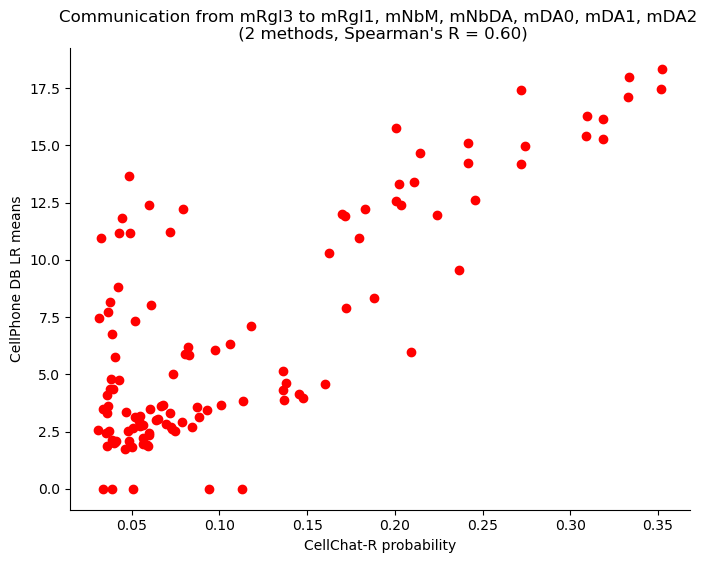

In [21]:
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

cellchatcomms = result_dfs[0]
ccrgl3 = cellchatcomms.loc[
    (cellchatcomms['source'] == "Rgl3") & (cellchatcomms['target'].isin(['FP-Rgl1', 'DA_ALDH1A1+', 'FP-DA0', 'DA_ALDH1A1-', 'FP-NbM'])),
    :
]
lianargl3 = result_dfs[6].loc[result_dfs[6].index.isin(ccrgl3.index), :]
lianargl3_extended = lianargl3.reindex(ccrgl3.index, fill_value=0)
lianargl3_extended = lianargl3_extended.loc[ccrgl3.index, :]

x = ccrgl3["prob"]
x = x.groupby(x.index).mean()  # average per index
y = lianargl3_extended['lr_means']
y = y.groupby(y.index).mean()

rho, p_value = spearmanr(x, y)
print(f"Spearman correlation: {rho:.3f}, p-value: {p_value:.3f}")

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x, y, c="red")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel("CellChat-R probability")
ax.set_ylabel("CellPhone DB LR means")
plt.title(f"Communication from mRgl3 to mRgl1, mNbM, mNbDA, mDA0, mDA1, mDA2 \n (2 methods, Spearman's R = {rho:.2f})")
plt.savefig("cellphone_onourDB_rediscoversall_H.pdf")
plt.show()

maxp pruned
cmap pruned
kern dropped
post pruned
FFTM dropped
GPOS pruned
GSUB pruned
glyf pruned
Added gid0 to subset
Added first four glyphs to subset
Closing glyph list over 'MATH': 56 glyphs before
Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'D', 'F', 'H', 'I', 'L', 'M', 'N', 'P', 'R', 'S', 'a', 'b', 'c', 'comma', 'd', 'e', 'eight', 'equal', 'f', 'five', 'four', 'g', 'h', 'hyphen', 'i', 'k', 'l', 'm', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'period', 'plus', 'quotesingle', 'r', 's', 'seven', 'six', 'space', 't', 'three', 'two', 'u', 'underscore', 'y', 'zero']
Glyph IDs:   [0, 1, 2, 3, 10, 11, 12, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 32, 36, 37, 38, 39, 41, 43, 44, 47, 48, 49, 51, 53, 54, 66, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 85, 86, 87, 88, 92]
Closed glyph list over 'MATH': 62 glyphs after
Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'D', 'F', 'H', 'I', 'L', 'M', 'N', 'P', 'R', 'S', 'a', 'b'

Spearman correlation: 0.730, p-value: 0.000


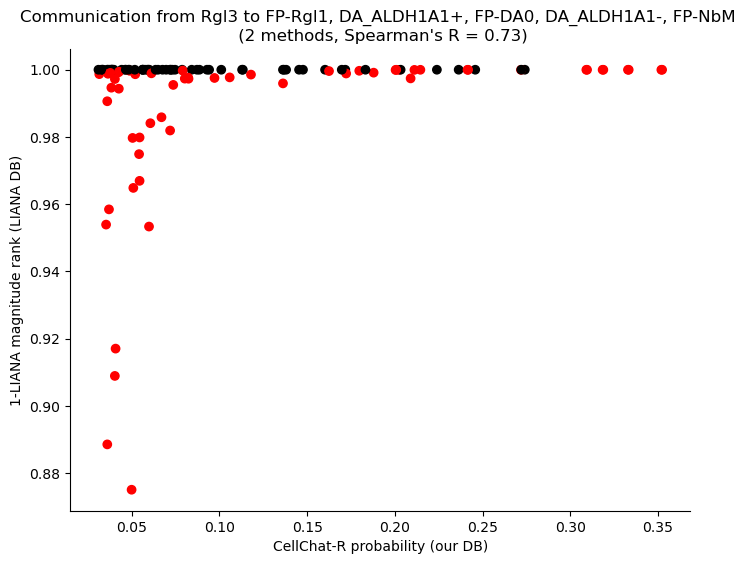

In [22]:
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

cellchatcomms = result_dfs[0]
ccrgl3 = cellchatcomms.loc[
    (cellchatcomms['source'] == "Rgl3") & (cellchatcomms['target'].isin(['FP-Rgl1', 'DA_ALDH1A1+', 'FP-DA0', 'DA_ALDH1A1-', 'FP-NbM'])),
    :
]
lianargl3 = result_dfs[1].loc[result_dfs[1].index.isin(ccrgl3.index), :]
lianargl3_extended = lianargl3.reindex(ccrgl3.index, fill_value=0)
lianargl3_extended = lianargl3_extended.loc[ccrgl3.index, :]

x = ccrgl3["prob"]
x = x.groupby(x.index).mean()  # average per index
y = 1-lianargl3_extended['magnitude_rank']
y = y.groupby(y.index).mean()
mask = np.array([True if val < 1 else False for val in y])

rho, p_value = spearmanr(x[mask], y[mask])
print(f"Spearman correlation: {rho:.3f}, p-value: {p_value:.3f}")

fig, ax = plt.subplots(figsize=(8, 6))
colors = np.where(mask, "red", "black")
ax.scatter(x, y, c=colors)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel("CellChat-R probability (our DB)")
ax.set_ylabel("1-LIANA magnitude rank (LIANA DB)")
plt.title(f"Communication from Rgl3 to FP-Rgl1, DA_ALDH1A1+, FP-DA0, DA_ALDH1A1-, FP-NbM \n (2 methods, Spearman's R = {rho:.2f})")
plt.savefig("lianaliana_vs_ourresults_H.pdf")
plt.show()

## Quick briefing on what LIANA claims

In [23]:
lianaliana = result_dfs[1].copy()
#lianaliana = lianaliana.loc[~lianaliana.index.isin(result_dfs[0].index),:]
lianaliana = lianaliana.loc[
    (lianaliana['source'] == "Rgl3") & (lianaliana['target'].isin(['FP-Rgl1', 'DA_ALDH1A1+', 'FP-DA0', 'DA_ALDH1A1-', 'FP-NbM'])),
    :
]
lianaliana = lianaliana.loc[lianaliana["specificity_rank"] < 0.1,:]
lianaliana = lianaliana.sort_values(by="magnitude_rank")
lianaliana['target-receptor'] = lianaliana['target'] + " * " + lianaliana['receptor']

lianaliana['overlap'] = 1 - lianaliana['magnitude_rank'] 

lianaliana['target-receptor']

Rgl3_DA_ALDH1A1+_NTN1_DCC         DA_ALDH1A1+ * DCC
Rgl3_FP-NbM_NTN1_DCC                   FP-NbM * DCC
Rgl3_DA_ALDH1A1+_SLIT2_DCC        DA_ALDH1A1+ * DCC
Rgl3_FP-NbM_SLIT2_DCC                  FP-NbM * DCC
Rgl3_FP-DA0_NTN1_DCC                   FP-DA0 * DCC
                                       ...         
Rgl3_FP-NbM_WNT7A_RECK                FP-NbM * RECK
Rgl3_DA_ALDH1A1-_BMP2_ACVR1     DA_ALDH1A1- * ACVR1
Rgl3_FP-NbM_WNT7A_FZD3_LRP6      FP-NbM * FZD3_LRP6
Rgl3_FP-Rgl1_WNT2B_FZD2_LRP6    FP-Rgl1 * FZD2_LRP6
Rgl3_FP-Rgl1_LAMA5_DAG1              FP-Rgl1 * DAG1
Name: target-receptor, Length: 1043, dtype: object

In [24]:
lianaliana.set_index(['target', 'receptor'], inplace=True)
lianaliana = lianaliana.groupby(['target', 'receptor', 'ligand'])['overlap'].mean().unstack()
lianaliana

ligand                A2M  ACTR2  ADAM10  ADAM12  ADAM15  ADAM9  AFDN  AGT  \
target      receptor                                                         
DA_ALDH1A1+ ACVR1B    NaN    NaN     NaN     NaN     NaN    NaN   NaN  NaN   
            ACVR2A    NaN    NaN     NaN     NaN     NaN    NaN   NaN  NaN   
            ADAM22    NaN    NaN     NaN     NaN     NaN    NaN   NaN  NaN   
            ADAM23    NaN    NaN     NaN     NaN     NaN    NaN   NaN  NaN   
            ADCY1     NaN    NaN     NaN     NaN     NaN    NaN   NaN  NaN   
...                   ...    ...     ...     ...     ...    ...   ...  ...   
FP-Rgl1     UNC5D     NaN    NaN     NaN     NaN     NaN    NaN   NaN  NaN   
            VANGL2    NaN    NaN     NaN     NaN     NaN    NaN   NaN  NaN   
            VASN      NaN    NaN     NaN     NaN     NaN    NaN   NaN  NaN   
            VLDLR     NaN    NaN     NaN     NaN     NaN    NaN   NaN  NaN   
            ZNRF3     NaN    NaN     NaN     NaN     NaN    NaN   NaN  NaN   

ligand                AGTRAP  ALCAM  ...  TXLNA  VCAN  VEGFA  VEGFB  VIM  \
target      receptor                 ...                                   
DA_ALDH1A1+ ACVR1B       NaN    NaN  ...    NaN   NaN    NaN    NaN  NaN   
            ACVR2A       NaN    NaN  ...    NaN   NaN    NaN    NaN  NaN   
            ADAM22       NaN    NaN  ...    NaN   NaN    NaN    NaN  NaN   
            ADAM23       NaN    NaN  ...    NaN   NaN    NaN    NaN  NaN   
            ADCY1        NaN    NaN  ...    NaN   NaN    NaN    NaN  NaN   
...                      ...    ...  ...    ...   ...    ...    ...  ...   
FP-Rgl1     UNC5D        NaN    NaN  ...    NaN   NaN    NaN    NaN  NaN   
            VANGL2       NaN    NaN  ...    NaN   NaN    NaN    NaN  NaN   
            VASN         NaN    NaN  ...    NaN   NaN    NaN    NaN  NaN   
            VLDLR        NaN    NaN  ...    NaN   NaN    NaN    NaN  NaN   
            ZNRF3        NaN    NaN  ...    NaN   NaN    NaN    NaN  NaN   

ligand                WIF1  WNT2B     WNT5A  WNT7A  WNT9A  
target      receptor                                       
DA_ALDH1A1+ ACVR1B     NaN    NaN       NaN    NaN    NaN  
            ACVR2A     NaN    NaN       NaN    NaN    NaN  
            ADAM22     NaN    NaN       NaN    NaN    NaN  
            ADAM23     NaN    NaN       NaN    NaN    NaN  
            ADCY1      NaN    NaN       NaN    NaN    NaN  
...                    ...    ...       ...    ...    ...  
FP-Rgl1     UNC5D      NaN    NaN       NaN    NaN    NaN  
            VANGL2     NaN    NaN  0.437431    NaN    NaN  
            VASN       NaN    NaN       NaN    NaN    NaN  
            VLDLR      NaN    NaN       NaN    NaN    NaN  
            ZNRF3      NaN    NaN       NaN    NaN    NaN  

[546 rows x 196 columns]

In [25]:
targets = lianaliana.index.get_level_values(0).unique()
receptors = lianaliana.index.get_level_values(1).unique()

colors = pd.read_csv("humouse.csv")
colors.index = colors.human

colors

,mouse,human,color
human,,,
FP-DA0,mDA0,FP-DA0,#1B9E77
NaN,mNbDA,NaN,#D95F02
FP-Rgl1,mRgl1,FP-Rgl1,#7570B3
Rgl3,mRgl3,Rgl3,#E7298A
NaN,mPeric,NaN,#66A61E
NaN,mMgl,NaN,#E6AB02
DA_ALDH1A1-,mDA1,DA_ALDH1A1-,#A6761D
DA_ALDH1A1+,mDA2,DA_ALDH1A1+,#666666
FP-NbM,mNbM,FP-NbM,#A6CEE3


In [26]:
lianaliana = lianaliana.fillna(0)
lianaliana

ligand                A2M  ACTR2  ADAM10  ADAM12  ADAM15  ADAM9  AFDN  AGT  \
target      receptor                                                         
DA_ALDH1A1+ ACVR1B    0.0    0.0     0.0     0.0     0.0    0.0   0.0  0.0   
            ACVR2A    0.0    0.0     0.0     0.0     0.0    0.0   0.0  0.0   
            ADAM22    0.0    0.0     0.0     0.0     0.0    0.0   0.0  0.0   
            ADAM23    0.0    0.0     0.0     0.0     0.0    0.0   0.0  0.0   
            ADCY1     0.0    0.0     0.0     0.0     0.0    0.0   0.0  0.0   
...                   ...    ...     ...     ...     ...    ...   ...  ...   
FP-Rgl1     UNC5D     0.0    0.0     0.0     0.0     0.0    0.0   0.0  0.0   
            VANGL2    0.0    0.0     0.0     0.0     0.0    0.0   0.0  0.0   
            VASN      0.0    0.0     0.0     0.0     0.0    0.0   0.0  0.0   
            VLDLR     0.0    0.0     0.0     0.0     0.0    0.0   0.0  0.0   
            ZNRF3     0.0    0.0     0.0     0.0     0.0    0.0   0.0  0.0   

ligand                AGTRAP  ALCAM  ...  TXLNA  VCAN  VEGFA  VEGFB  VIM  \
target      receptor                 ...                                   
DA_ALDH1A1+ ACVR1B       0.0    0.0  ...    0.0   0.0    0.0    0.0  0.0   
            ACVR2A       0.0    0.0  ...    0.0   0.0    0.0    0.0  0.0   
            ADAM22       0.0    0.0  ...    0.0   0.0    0.0    0.0  0.0   
            ADAM23       0.0    0.0  ...    0.0   0.0    0.0    0.0  0.0   
            ADCY1        0.0    0.0  ...    0.0   0.0    0.0    0.0  0.0   
...                      ...    ...  ...    ...   ...    ...    ...  ...   
FP-Rgl1     UNC5D        0.0    0.0  ...    0.0   0.0    0.0    0.0  0.0   
            VANGL2       0.0    0.0  ...    0.0   0.0    0.0    0.0  0.0   
            VASN         0.0    0.0  ...    0.0   0.0    0.0    0.0  0.0   
            VLDLR        0.0    0.0  ...    0.0   0.0    0.0    0.0  0.0   
            ZNRF3        0.0    0.0  ...    0.0   0.0    0.0    0.0  0.0   

ligand                WIF1  WNT2B     WNT5A  WNT7A  WNT9A  
target      receptor                                       
DA_ALDH1A1+ ACVR1B     0.0    0.0  0.000000    0.0    0.0  
            ACVR2A     0.0    0.0  0.000000    0.0    0.0  
            ADAM22     0.0    0.0  0.000000    0.0    0.0  
            ADAM23     0.0    0.0  0.000000    0.0    0.0  
            ADCY1      0.0    0.0  0.000000    0.0    0.0  
...                    ...    ...       ...    ...    ...  
FP-Rgl1     UNC5D      0.0    0.0  0.000000    0.0    0.0  
            VANGL2     0.0    0.0  0.437431    0.0    0.0  
            VASN       0.0    0.0  0.000000    0.0    0.0  
            VLDLR      0.0    0.0  0.000000    0.0    0.0  
            ZNRF3      0.0    0.0  0.000000    0.0    0.0  

[546 rows x 196 columns]

In [27]:
lianaliana.sum(axis=1)

target       receptor
DA_ALDH1A1+  ACVR1B      0.868918
             ACVR2A      0.896786
             ADAM22      0.223672
             ADAM23      0.407493
             ADCY1       0.230810
                           ...   
FP-Rgl1      UNC5D       0.999153
             VANGL2      0.437431
             VASN        0.204778
             VLDLR       1.303419
             ZNRF3       0.274490
Length: 546, dtype: float64

In [28]:
row_mask = lianaliana.sum(axis=1) > 0.1

col_mask = lianaliana.sum(axis=0) > 0.1

lianaliana = lianaliana.loc[row_mask, col_mask]
lianaliana

ligand                A2M  ACTR2  ADAM10  ADAM12  ADAM15  ADAM9  AFDN  AGT  \
target      receptor                                                         
DA_ALDH1A1+ ACVR1B    0.0    0.0     0.0     0.0     0.0    0.0   0.0  0.0   
            ACVR2A    0.0    0.0     0.0     0.0     0.0    0.0   0.0  0.0   
            ADAM22    0.0    0.0     0.0     0.0     0.0    0.0   0.0  0.0   
            ADAM23    0.0    0.0     0.0     0.0     0.0    0.0   0.0  0.0   
            ADCY1     0.0    0.0     0.0     0.0     0.0    0.0   0.0  0.0   
...                   ...    ...     ...     ...     ...    ...   ...  ...   
FP-Rgl1     UNC5D     0.0    0.0     0.0     0.0     0.0    0.0   0.0  0.0   
            VANGL2    0.0    0.0     0.0     0.0     0.0    0.0   0.0  0.0   
            VASN      0.0    0.0     0.0     0.0     0.0    0.0   0.0  0.0   
            VLDLR     0.0    0.0     0.0     0.0     0.0    0.0   0.0  0.0   
            ZNRF3     0.0    0.0     0.0     0.0     0.0    0.0   0.0  0.0   

ligand                AGTRAP  ALCAM  ...  TNFSF12  VCAN  VEGFA  VEGFB  VIM  \
target      receptor                 ...                                     
DA_ALDH1A1+ ACVR1B       0.0    0.0  ...      0.0   0.0    0.0    0.0  0.0   
            ACVR2A       0.0    0.0  ...      0.0   0.0    0.0    0.0  0.0   
            ADAM22       0.0    0.0  ...      0.0   0.0    0.0    0.0  0.0   
            ADAM23       0.0    0.0  ...      0.0   0.0    0.0    0.0  0.0   
            ADCY1        0.0    0.0  ...      0.0   0.0    0.0    0.0  0.0   
...                      ...    ...  ...      ...   ...    ...    ...  ...   
FP-Rgl1     UNC5D        0.0    0.0  ...      0.0   0.0    0.0    0.0  0.0   
            VANGL2       0.0    0.0  ...      0.0   0.0    0.0    0.0  0.0   
            VASN         0.0    0.0  ...      0.0   0.0    0.0    0.0  0.0   
            VLDLR        0.0    0.0  ...      0.0   0.0    0.0    0.0  0.0   
            ZNRF3        0.0    0.0  ...      0.0   0.0    0.0    0.0  0.0   

ligand                WIF1  WNT2B     WNT5A  WNT7A  WNT9A  
target      receptor                                       
DA_ALDH1A1+ ACVR1B     0.0    0.0  0.000000    0.0    0.0  
            ACVR2A     0.0    0.0  0.000000    0.0    0.0  
            ADAM22     0.0    0.0  0.000000    0.0    0.0  
            ADAM23     0.0    0.0  0.000000    0.0    0.0  
            ADCY1      0.0    0.0  0.000000    0.0    0.0  
...                    ...    ...       ...    ...    ...  
FP-Rgl1     UNC5D      0.0    0.0  0.000000    0.0    0.0  
            VANGL2     0.0    0.0  0.437431    0.0    0.0  
            VASN       0.0    0.0  0.000000    0.0    0.0  
            VLDLR      0.0    0.0  0.000000    0.0    0.0  
            ZNRF3      0.0    0.0  0.000000    0.0    0.0  

[527 rows x 190 columns]

maxp pruned
cmap pruned
kern dropped
post pruned
FFTM dropped
GPOS pruned
GSUB pruned
glyf pruned
Added gid0 to subset
Added first four glyphs to subset
Closing glyph list over 'MATH': 59 glyphs before
Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'a', 'c', 'd', 'e', 'eight', 'f', 'five', 'four', 'g', 'h', 'hyphen', 'i', 'k', 'l', 'm', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'period', 'r', 'seven', 'six', 'space', 't', 'three', 'two', 'u', 'underscore', 'zero']
Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 59, 66, 68, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 85, 87, 88]
Closed glyph list over 'MATH': 65 glyphs after
Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N

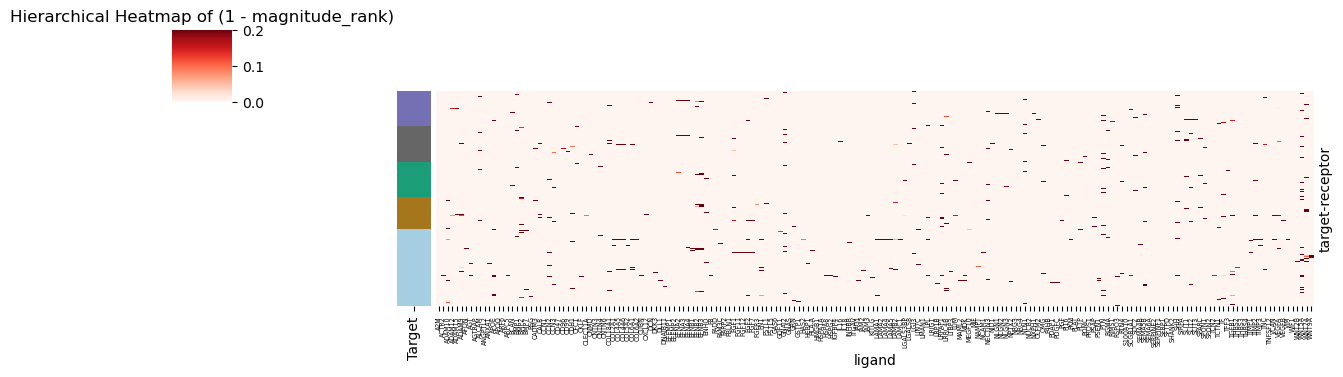

In [29]:
cols = colors.loc[['FP-Rgl1', 'DA_ALDH1A1+', 'FP-DA0', 'DA_ALDH1A1-', 'FP-NbM'], "color"].values

target_colors = cols

target_color_dict = dict(zip(targets, target_colors))

row_colors = pd.DataFrame({
    'Target': [target_color_dict[t] for t in lianaliana.index.get_level_values(0)],
}, index=lianaliana.index)

g=sns.clustermap(
    lianaliana.fillna(0),
    cmap="Reds", vmax=0.2,
    linewidths=0,
    col_cluster=False, 
    row_cluster=False, 
    row_colors=row_colors,xticklabels=True,yticklabels=False,
    figsize=(12, 4)
)
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xticklabels(), fontsize=4.5)
plt.title("Hierarchical Heatmap of (1 - magnitude_rank)")
plt.savefig("lianaliana_extracalls_H.pdf")
plt.show()

## If one did LIANA only, signaling hubs are the same

maxp pruned
cmap pruned
kern dropped
post pruned
FFTM dropped
GPOS pruned
GSUB pruned
glyf pruned
Added gid0 to subset
Added first four glyphs to subset
Closing glyph list over 'MATH': 43 glyphs before
Glyph names: ['.notdef', '.null', 'A', 'B', 'D', 'F', 'G', 'H', 'I', 'L', 'M', 'N', 'O', 'P', 'R', 'T', 'a', 'b', 'c', 'd', 'e', 'f', 'five', 'four', 'g', 'hyphen', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'plus', 'r', 's', 'space', 't', 'three', 'two', 'u', 'underscore', 'zero']
Glyph IDs:   [0, 1, 2, 3, 14, 16, 19, 20, 21, 22, 23, 24, 36, 37, 39, 41, 42, 43, 44, 47, 48, 49, 50, 51, 53, 55, 66, 68, 69, 70, 71, 72, 73, 74, 76, 79, 80, 81, 82, 85, 86, 87, 88]
Closed glyph list over 'MATH': 43 glyphs after
Glyph names: ['.notdef', '.null', 'A', 'B', 'D', 'F', 'G', 'H', 'I', 'L', 'M', 'N', 'O', 'P', 'R', 'T', 'a', 'b', 'c', 'd', 'e', 'f', 'five', 'four', 'g', 'hyphen', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'plus', 'r', 's', 'space', 't', 'three', 'two', 'u', 'unders

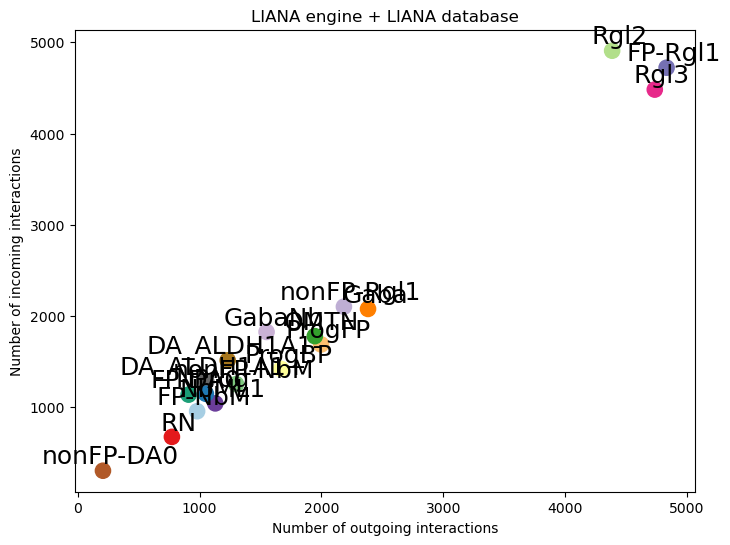

In [30]:
lrresults = liana_results_lianaDB.copy()

sourcescores = lrresults['source'].value_counts()
targetscores = lrresults['target'].value_counts()
targetscores = targetscores.loc[sourcescores.index]

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(sourcescores, targetscores, c=colors.loc[sourcescores.index, 'color'], s=120)

for label, x, y in zip(sourcescores.index, sourcescores, targetscores):
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(5, 5), ha='center', fontsize=18)

plt.xlabel('Number of outgoing interactions')
plt.ylabel('Number of incoming interactions')
plt.title('LIANA engine + LIANA database')
plt.savefig("signalinghubsarepreserved_H.pdf")
plt.show()

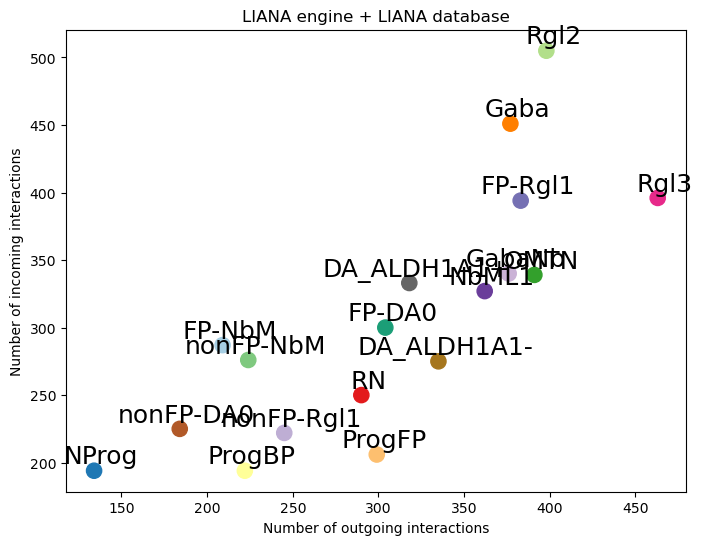

In [31]:
lrresults = result_dfs[0].copy()

sourcescores = lrresults['source'].value_counts()
targetscores = lrresults['target'].value_counts()
targetscores = targetscores.loc[sourcescores.index]

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(sourcescores, targetscores, c=colors.loc[sourcescores.index, 'color'], s=120)

for label, x, y in zip(sourcescores.index, sourcescores, targetscores):
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(5, 5), ha='center', fontsize=18)

plt.xlabel('Number of outgoing interactions')
plt.ylabel('Number of incoming interactions')
plt.title('LIANA engine + LIANA database')
#plt.savefig("signalinghubsarepreserved_H.pdf")
plt.show()

## Export

In [32]:
for res, name in zip(result_dfs, names):
    cellchatcomms['confirmedin_' + name] = False
    cellchatcomms.loc[cellchatcomms.index.isin(res.index), 'confirmedin_' + name] = True

/tmp/ipykernel_106816/1850867030.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_106816/1850867030.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_106816/1850867030.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_1068

In [33]:
cellchatcomms_rgl3 = cellchatcomms.loc[cellchatcomms['source'] == "Rgl3",:]
cellchatcomms_rgl3.to_csv("cellchatcomms_rgl3_comparison_H.csv")
cellchatcomms_rgl3

,source,target,ligand,receptor,prob,pval,interaction_name,interaction_name_2,pathway_name,annotation,evidence,confirmedin_CellChat-R (our DB),confirmedin_LIANA (LIANA DB),confirmedin_LIANA (our DB),confirmedin_CellChat-py (LIANA DB),confirmedin_CellChat-py (our DB),confirmedin_CellPhone (LIANA DB),confirmedin_CellPhone (our DB)
Rgl3_Gaba_SLIT2_ROBO1,Rgl3,Gaba,SLIT2,ROBO1,0.414546,0.0,SLIT2_ROBO1,SLIT2_ROBO1,SLIT2,NaN,"celltalkdb_10102268, cellphonedb_reactome;unip...",True,True,True,True,True,True,True
Rgl3_DA_ALDH1A1+_NTN1_DCC,Rgl3,DA_ALDH1A1+,NTN1,DCC,0.352335,0.0,NTN1_DCC,NTN1_DCC,NTN1,NaN,celltalkdb_8861902,True,True,True,True,True,True,True
Rgl3_DA_ALDH1A1+_SLIT2_DCC,Rgl3,DA_ALDH1A1+,SLIT2,DCC,0.351909,0.0,SLIT2_DCC,SLIT2_DCC,SLIT2,NaN,celltalkdb_32196115,True,True,True,True,True,True,True
Rgl3_nonFP-NbM_NTN1_DCC,Rgl3,nonFP-NbM,NTN1,DCC,0.350336,0.0,NTN1_DCC,NTN1_DCC,NTN1,NaN,celltalkdb_8861902,True,True,True,True,True,True,True
Rgl3_nonFP-NbM_SLIT2_DCC,Rgl3,nonFP-NbM,SLIT2,DCC,0.349910,0.0,SLIT2_DCC,SLIT2_DCC,SLIT2,NaN,celltalkdb_32196115,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rgl3_Rgl3_CNTN4_PTPRG,Rgl3,Rgl3,CNTN4,PTPRG,0.030669,0.0,CNTN4_PTPRG,CNTN4_PTPRG,CNTN4,NaN,celltalkdb_20133774,True,True,True,True,True,True,True
Rgl3_ProgFP_PTN_PTPRZ1,Rgl3,ProgFP,PTN,PTPRZ1,0.030648,0.0,PTN_PTPRZ1,PTN - PTPRZ1,PTN,Secreted Signaling,PMID: 28356350; PMID: 25620911,True,True,True,True,True,True,True
Rgl3_ProgFP_PTN_PTPRZ1,Rgl3,ProgFP,PTN,PTPRZ1,0.030648,0.0,PTN_PTPRZ,PTN_PTPRZ,PTN,NaN,cellphonedb_PMID:25644401,True,True,True,True,True,True,True
Rgl3_ProgFP_PTN_PTPRZ1,Rgl3,ProgFP,PTN,PTPRZ1,0.030648,0.0,PTN_PTPRZ11,PTN_PTPRZ1,PTN,NaN,celltalkdb_25644401,True,True,True,True,True,True,True


In [34]:
liana_results_lianaDB.to_csv("liana_on_liana_ALL_H.csv")

In [35]:
liana_results_lianaDB

,source,target,ligand,receptor,lr_means,cellphone_pvals,expr_prod,scaled_weight,lr_logfc,spec_weight,lrscore,specificity_rank,magnitude_rank
33856,FP-Rgl1,Gaba,SLIT2,ROBO1,51.581451,0.000,2655.517334,5.101047,38.648687,0.198108,0.996664,8.879593e-07,3.940651e-10
121561,Rgl3,Gaba,SLIT2,ROBO1,37.627449,0.000,1152.778442,4.196105,27.428477,0.086000,0.994945,3.060392e-06,1.576253e-09
144786,nonFP-Rgl1,Gaba,SLIT2,ROBO1,35.699886,0.000,945.195007,4.071100,42.442033,0.070514,0.994421,9.391333e-06,3.546555e-09
40795,FP-Rgl1,nonFP-NbM,SLIT2,DCC,32.401169,0.000,763.698547,1.644432,54.186610,0.049249,0.993797,7.822773e-05,9.851453e-09
94482,ProgFP,Gaba,SLIT2,ROBO1,33.561523,0.000,714.910034,3.932425,-3.217133,0.053334,0.993590,8.469137e-04,9.851453e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52947,GabaNb,FP-Rgl1,LAMB1,DAG1,0.223021,0.000,0.037353,0.237902,0.641478,0.008355,0.528411,1.909531e-02,9.998219e-01
99911,ProgFP,nonFP-Rgl1,COL1A2,CD44,0.239899,0.000,0.036261,0.387310,1.123588,0.037065,0.524711,2.286715e-03,9.998219e-01
55364,GabaNb,OMTN,SEMA3C,NRP2_PLXNA1,0.223018,0.000,0.045183,0.248297,-1.655760,0.014385,0.552040,1.653116e-02,9.998934e-01
55360,GabaNb,OMTN,SEMA3C,NRP1_PLXNA1,0.223018,0.000,0.045183,0.248297,-1.655760,0.014385,0.552040,1.653116e-02,9.998934e-01
